### Script de modelagem direta da bacia de reconcavo - dados grav da ANP:

In [3]:
# importando pacotes necessarios:
import numpy as np # pacote numerico
import pylab as py 
import pandas as pd
#from numpy.linalg import inv # pacote de algebra linear
import matplotlib.pyplot as plt # pacote de plotagem
#import pandas as pd # pacode de tratamento de dados 
#from mpl_toolkits.basemap import Basemap
#from matplotlib.patches import Polygon
#from scipy.interpolate import Rbf # radial basis functions technique
#para plotar as figuras nas celulas do jupyter notebook:
from matplotlib.path import Path
from matplotlib.patches import PathPatch
#%matplotlib inline
%matplotlib qt
#import utm
#plt.plot ([1,2])

### Importando os pacotes com as nossas funcoes:

In [4]:
from modules.iplots import pick_points, model_masses # para fazer o plot interativo
from modules.gravity import grav2D_anom, g_sphere # funcao que calcula dados de gravidade (rao 1994)

### Leitura dos dados reais do perfil de Reconcavo:

In [6]:
boug_residual, UTMe, UTMn= np.loadtxt('bouguer_recon_perfil_MONO.txt',
                                             skiprows=1, usecols=(0,3,4), unpack=True)
np.size(UTMe)

914

In [37]:
# Plot dos dados para verificação:
plt.figure(figsize=(15,7), facecolor='w')

p1 = plt.scatter(UTMe,UTMn,s=5.0,c=boug_residual,marker='*', cmap=plt.cm.jet)
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="vertical")
cbar.set_label('Residual Bouguer Anomaly $ (mGal) $',fontsize=15, rotation = 90)
#plt.plot(x_utm, gz,'*r')
#plt.title ('Gravity Data (mGal)', fontsize = 16)
plt.xlabel ('Easting ($m$)', fontsize = 14)
plt.ylabel ('Northing ($m$)', fontsize = 14)
plt.grid()
#plt.savefig('Bouguer.png', dpi=300, transparent=True, bbox_inches="tight" )
plt.show()

### Definicao da area do modelo de bacia sedimentar:

In [8]:
area= []
xmin = np.min(UTMe)
xmax = np.max(UTMe)
zmin =  0.0 # Nivel medio dos mares (verificar) #np.min( (elev) ) #-100.0
zmax = 4300.0 #adaptado para metros (vindo da analise dos dados sismicos) !
area = [xmin, xmax, zmin, zmax]
print(area)


[514122.3547257932, 589038.9669335944, 0.0, 4300.0]


### Criacao do modelo de bacia atraves dos clicks na area de plot: 

In [9]:
%matplotlib qt 
axes = plt.figure().add_subplot(1,1,1)
xv,zv = pick_points(area, axes, marker='o', color='k', size=8, xy2ne=False)

### calculo da anomalia de gravidade produzido pelo modelo de bacia (artigo do Rao et. al., 1994):

In [44]:
# info da propriedade fisica:
delta_rho = -0.33 #(g/cm³)# contraste de Densidade do arenito em relacao ao embasamento local no topo da bacia!
beta = 2.57
# convertendo para SI(kg/m³):
rho_ref = 3.0 # densidade do embasamento (checar!)
rho = delta_rho + rho_ref
#rho = rho * 1000.0 
print('densidade no topo da bacia em g/cm³=', rho)

densidade no topo da bacia em g/cm³= 2.67


In [45]:
#Criacao de variaveis necessarias para o calculo da anomalia:
nv = np.size(xv)
#print nv
nper = np.size(UTMe)
#print nper
# calculo da anomalia grav atraves de rao1994:
xd = np.zeros( (nv,) )
zd = np.zeros( (nv,) )
grav = np.zeros( (nper,) )
for i in range(nper):
    for j in range(nv):
        xd[j] = ( xv[j] - UTMe[i]) /1000.0
        zd[j] = (zv[j] - 0) /1000.0
    # chamando a funcao do rao 1994:
    grav[i] = grav2D_anom(xd,zd,delta_rho,beta)

In [46]:
# computing hyperbolic density function
###################################################

z = np.linspace( np.amin(zv), np.amax(zv), np.size(zv) ) # em km
rhoz = (delta_rho)*beta**2/(beta + (z/100.0) )**2 # conversao para g/cm3 (CORRETO!!!!)
#rhoz = rhoz + 2.670

In [47]:
# save figure and a file for reproduction:
A = np.zeros( (len(z),2) )
A[:,0] = z
A[:,1] = rhoz

#caminho = 'figs/density_intrusion5'
# save text file for ploting issues:
#np.savetxt(caminho+'.txt', A, header=' Z , rhoZ', delimiter=' ' )

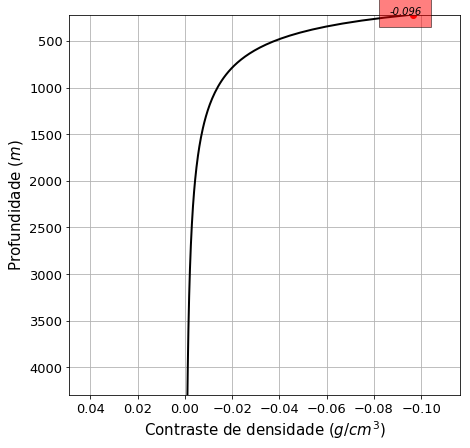

In [48]:
# plot of the density distribution:
plt.close('all')
fig = plt.figure(figsize=(7,7))

# definition of fontsize:
fs = 15 
# invert axis
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# set labelsize 
plt.tick_params(axis='y', labelsize=fs-2)
plt.tick_params(axis='x', labelsize=fs-2,labelbottom=True,labeltop=False)

plt.text(rhoz[0]+0.01, z[0]+0.148, str( format(rhoz[0],'.3f') ), style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

plt.plot(rhoz,z,'k-',linewidth=2.0)
plt.plot(rhoz[0],z[0],'ro',linewidth=2.0)
plt.grid()
plt.xlabel('Contraste de densidade $(g/cm^3)$',fontsize=fs)
plt.ylabel('Profundidade $(m)$',fontsize=fs)
plt.axis([np.max(rhoz)+0.05, np.min(rhoz)-0.02, np.max(z)+0.1, np.min(z)-0.1])
#plt.savefig(caminho+'.png', dpi=300, transparent=True, bbox_inches="tight" )
plt.show()
#############################################################################################################

In [49]:
# get the number of elements of xv (number of vertices of the polygon)
n = np.size(xv)     
# create new working arrays for the vertices of a closed polygon:
x = np.zeros( (n+1,) )  
z = np.zeros( (n+1,) ) 
x[0:n] = xv
z[0:n] = zv
# GAMBIARRA PARA PLOT DE CORES ASSSOCIADOOS À BACIA MODELADA (PENSAR EM ALGO MILHÓ) 
x[n:n+1] = min(xv)
z[n:n+1] = np.min(zv)

In [50]:
# save fig and a txt file for reproduction:
#caminho = "figs/model_intrusion_reconcavo1"

B = np.zeros( (len(z),2) )
B[:,0] = x
B[:,1] = z

# save text file for ploting issues:
#np.savetxt(caminho+'.txt', B, header=' Easting(m) , depth(m)', delimiter=' ' )

In [28]:
# and the modeled basin:
plt.close('all')
fig = plt.figure(figsize=(14,8))
path = Path(np.array([x,z]).transpose())
patch = PathPatch(path, facecolor='none')

plt.gca().add_patch(patch) 
plt.plot(xv,zv,'k-o') #DEVE SER XV E ZV REALMENTE!!!

# plot the last and the first corner to close up the polygon:
fs = 18 # font size for the label
plt.gca().invert_yaxis()
plt.xlabel(r'UTM E $(m)$',fontsize=fs)
plt.ylabel(r'Profundidade $(m)$',fontsize=fs)
plt.xlim([np.min(xv), np.max(xv)])

##################################################################
# plot the density variation together with the basin:
##################################################################

im = plt.imshow(rhoz.reshape(np.size(zv),1),  cmap=plt.cm.Wistia,interpolation="bicubic",
                origin='lower',extent=[min(xv), max(xv), min(zv), max(zv)],aspect="auto", clip_path=patch, clip_on=True)
#im.set_clip_path(patch)

# OBS:::::: para reverter a escala de cores, basta um simples "_r" ! sucesso de vida!!!!
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'Contraste de densidade $g/cm^3$', fontsize=fs)

#plt.savefig(caminho+'.png', dpi=300, transparent=True, bbox_inches="tight" )
plt.show()

### Plot do modelo atual + os dados reais para comparação:

In [20]:
# save fig and a txt file for reproduction:
#caminho = "figs/datafit_intrusion5"

C = np.zeros( (len(UTMe),3) )
C[:,0] = UTMe
C[:,1] = grav
C[:,2] = boug_residual

# save text file for ploting issues:
#np.savetxt(caminho+'.txt', C, header=' Easting(m) Gpred(mGal) Gobs(mGal)', delimiter=' ' )

In [35]:
plt.close('all')
plt.plot(UTMe, boug_residual,'.k', label='dado observado')
plt.plot(UTMe, grav,'.r', label='dado predito')
plt.legend()
plt.grid()
plt.xlabel('UTM E (m)', fontsize = 14)
plt.ylabel('Anomalia Bouguer (mGal)', fontsize = 14)
#plt.savefig(caminho+'.png', dpi=300, transparent=True, bbox_inches="tight" )
plt.show()

# Criacao de um branch para nao perder clicks promissores!!!!!!

In [ ]:
## criacao do branch --- variaveis guardadas para nao perder cliques promissores!
### SOMENTE RODAR ESSA CELULA EM CASO DE MELHORIAS SIGNFICATIVAS NOS CLICKS!!!!
x_branch = np.copy(xv)
y_branch = np.copy(zv)
gz_branch = np.copy(grav)

### TODO:: Gerar um arquivo com as variaveis branch para backup de clicks promissoes!

In [ ]:
# ---- comparacao entre o dado branch vs o ultimo click-----:
plt.plot(UTMe, grav,'.k', label='observed data')
plt.plot(UTMe, gz_branch,'.m', label='branch data')
plt.legend()
plt.grid()
plt.title ('Gravity Data (mGal)', fontsize = 16)
plt.xlabel ('UTM x(m)', fontsize = 14)
plt.ylabel ('Gravity Anomaly (mGal)', fontsize = 14)
plt.show()

## leitura de dados anteriores

In [10]:
#leitura dos dados do modelo

#modelo= pd.read_csv('Dados finais/model_basin_reconcavo5.txt', sep=' ', header=0 )
#xv=modelo['Easting(m)']
#zv=modelo['depth(m)']


In [14]:
#leitura dos dados do ajuste

#ajuste= pd.read_csv('Dados finais/datafit5.txt', sep=' ', header=0 )
#ajuste

## Inclusão de heterogeneidades

In [38]:
# limites para a densidade da intrusao (g/cm3)
arearho= [2.4,2.5,2.4,2.5]

In [39]:
elev=np.zeros((914))

In [40]:

%matplotlib qt
# obtencao das coordenadas 2D e a densidade da intrusao atraves de clicks:
xb, zb, rhob = model_masses(area, arearho, background=[xv,zv])


In [41]:
# Calcular a anomalia produzida pelas bolinhas:
intruso=[] # lista para guardar todas as bolinhas:
for i in range(len(xb)):
    intruso.append( [ xb[i],zb[i],rhob[i] ] )
gravb = g_sphere(UTMe, elev, intruso, component='z')

In [42]:

# principio da superposicao para computar o efeito da poligono (grav) + intrusao (gravb}):
gravt = grav + gravb

In [43]:
%matplotlib inline
# and the modeled basin:
fig = plt.figure(figsize=(14,8))
path = Path(np.array([x,z]).T)
patch = PathPatch(path, facecolor='none')

#######################################################
plt.gca().add_patch(patch)
plt.plot(xv,zv,'k-o')

# plot the last and the first corner to close up the polygon:
fs = 18 # font size for the label
plt.gca().invert_yaxis()
plt.xlabel(r'UTM x $(m)$',fontsize=fs)
plt.ylabel(r'Depth $(m)$',fontsize=fs)
plt.xlim([np.min(xv), np.max(xv)])

##################################################################
# plot the density variation together with the basin:
##################################################################

im = plt.imshow(rhoz.reshape(np.size(zv),1),  cmap=plt.cm.Wistia, interpolation="bicubic",
                origin='lower',extent=[min(x), max(x), min(z), max(z)],aspect="auto", clip_path=patch, clip_on=True)
#im.set_clip_path(patch)

# OBS:::::: para reverter a escala de cores, basta um simples "_r" ! sucesso de vida!!!!
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'Density constrast in $g/cm^3$', fontsize=fs)


rb = np.array(rhob)-rho_ref
print (rb)
plt.scatter(xb,zb,s=60,c=rb,cmap='Wistia', vmin=min(rhoz), vmax=max(rhoz) )

# Mat, verificar!!!!!!
#plt.savefig(caminho +".png", dpi=300, transparent=True, bbox_inches='tight')
plt.show()

ValueError: setting an array element with a sequence.

<Figure size 1008x576 with 0 Axes>

## Plot do ajuste dos dados com a intrusao

In [108]:

# save fig and a txt file for reproduction:
#caminho = "figs/datafit_intruso1"
C = np.zeros( (len(UTMe),3) )
C[:,0] = UTMe
C[:,1] = gravt
C[:,2] = boug_residual
# save text file for ploting issues:
#np.savetxt(caminho+'.txt', C, header=' UTMx(m) Gpred(mGal) Gobs(mGal)', delimiter=' ' )

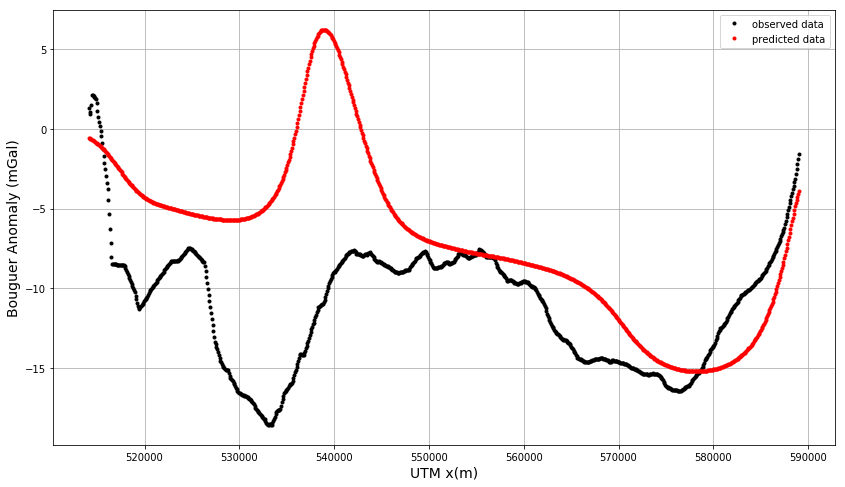

In [110]:
fig = plt.figure(figsize=(14,8))

plt.plot(UTMe,boug_residual,'.k', label='observed data')
plt.plot(UTMe,gravt,'.r', label='predicted data')
plt.legend()
plt.grid()
#plt.title ('Gravity Data (mGal)', fontsize = 16)
plt.xlabel ('UTM x(m)', fontsize = 14)
plt.ylabel ('Bouguer Anomaly (mGal)', fontsize = 14)
#plt.savefig(caminho+'png', dpi=300)
plt.show()